# 1.0 安裝套件

In [2]:
# !pip install matplotlib
# !pip install yfinance
# !pip install pandas
# !pip install numpy


In [3]:
# !pip install pyarrow

In [6]:
import pandas as pd
import numpy as np

# 2.0 資料前處理和運算

## 2.1 讀取數據

- 使用 pandas 的 read_csv 讀取 csv 檔案

In [7]:
import pandas as pd

# 讀取 CSV 文件
df = pd.read_csv('2023_11_sales.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2023_11_sales.csv'

* 在使用 pandas 的 read_csv 函數讀取 CSV 文件時，有時候可能會遇到一些常見的問題。
* 使用 engine='python' 參數通常是一種解決方案，特別是在某些情況下，read_csv 使用的預設引擎可能不夠靈活。

In [8]:
# UnicodeDecodeError:
# 如果你遇到了類似 UnicodeDecodeError 的錯誤，這可能是因為文件包含了非 UTF-8 編碼的字符。
# 在這種情況下，可以嘗試使用 engine='python' 並指定正確的編碼。
# 如果使用 encoding='utf-8' 仍然無法解決，可以試試 encoding='big5' 或是 'ansi'

df = pd.read_csv('2023_11_sales.csv', engine='python', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '2023_11_sales.csv'

- 使用 pandas 的 read_feather 讀取 feather 檔案

In [9]:
df = pd.read_feather('還原股價_Vay.feather')

## 2.2 查看數據結構

使用 head()、info()、describe()等方法來快速查看數據的前幾行、結構信息和統計摘要。

In [14]:
df.columns

Index(['證券代碼', '年月日', '開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)',
       '成交值(千元)', '報酬率％', '週轉率％', '流通在外股數(千股)', '市值(百萬元)', '最後揭示買價', '最後揭示賣價',
       '報酬率-Ln', '市值比重％', '成交值比重％', '成交筆數(筆)', '本益比-TSE', '本益比-TEJ',
       '股價淨值比-TSE', '股價淨值比-TEJ', '漲跌停', '股價營收比-TEJ', '股利殖利率-TSE', '現金股利率',
       '股價漲跌(元)', '高低價差%', '次日開盤參考價', '次日漲停價', '次日跌停價', '注意股票(A)', '處置股票(D)',
       '全額交割(Y)', '市場別'],
      dtype='object')

In [13]:
df[df['證券代碼']=='0050']

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別


In [10]:
# 查看前 5 行
df.head()

# 查看前 10 行
df.head(10)

# 查看後 5 行
df.tail()

# 查看後 10 行
df.tail(10)

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
2122679,9944 新麗,2023-08-23,19.700001,19.850000,19.600000,19.750000,108,2144,-0.2525,0.0990,...,5.3165,-0.05,1.2626,19.750000,21.700001,17.799999,NaN,NaN,NaN,TSE
2122680,9945 潤泰新,2023-08-23,33.299999,33.299999,33.000000,33.000000,3316,109711,-1.0495,0.1049,...,0.0000,-0.35,0.8996,33.000000,36.299999,29.700001,NaN,NaN,NaN,TSE
2122681,9946 三發地產,2023-08-23,13.950000,14.150000,13.950000,14.100000,167,2346,0.7143,0.0511,...,3.0335,0.10,1.4286,14.100000,15.500000,12.700000,NaN,NaN,NaN,TSE
2122682,9949 琉園,2023-08-23,12.600000,12.700000,12.450000,12.450000,77,967,0.0000,0.1749,...,0.0000,0.00,2.0080,12.450000,13.650000,11.250000,NaN,NaN,NaN,OTC
2122683,9950 萬國通,2023-08-23,15.700000,17.250000,15.700000,17.250000,1242,21272,9.8726,0.7405,...,0.0000,1.55,9.8726,17.250000,18.950001,15.550000,NaN,NaN,NaN,OTC
2122684,9951 皇田,2023-08-23,73.300003,75.099998,73.300003,74.599998,114,8536,1.7735,0.1522,...,4.4236,1.30,2.4557,74.599998,82.000000,67.199997,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850000,22.049999,21.850000,21.900000,143,3146,0.2288,0.1386,...,0.0000,0.05,0.9153,21.900000,24.049999,19.750000,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000000,143.500000,138.000000,142.000000,2536,359064,2.8986,1.0749,...,0.3481,4.00,3.9855,142.000000,156.000000,128.000000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350000,26.600000,26.299999,26.400000,7,184,0.0000,0.0208,...,8.3335,0.00,1.1364,26.400000,29.000000,23.799999,NaN,NaN,NaN,OTC
2122688,9962 有益,2023-08-23,16.850000,16.900000,16.650000,16.900000,122,2068,0.5952,0.1352,...,10.6509,0.10,1.4881,16.900000,18.549999,15.250000,NaN,NaN,NaN,OTC


In [85]:
# 查看統計摘要
print(df.describe())

                                 年月日      開盤價(元)      最高價(元)      最低價(元)  \
count                        2122689 2122683.000 2122689.000 2122689.000   
mean   2021-04-30 07:12:37.743973888      55.112      55.916      54.255   
min              2019-01-02 00:00:00       0.100       0.110       0.100   
25%              2020-03-13 00:00:00      16.300      16.500      16.091   
50%              2021-05-18 00:00:00      28.210      28.550      27.858   
75%              2022-06-07 00:00:00      54.508      55.178      53.797   
max              2023-08-23 00:00:00    4488.230    4540.520    4440.297   
std                              NaN     123.094     125.239     120.757   

           收盤價(元)     成交量(千股)       成交值(千元)        報酬率％        週轉率％  \
count 2122689.000 2122689.000   2122689.000 2122689.000 2122689.000   
mean       55.006    2531.804    162802.109       0.069       0.875   
min         0.110       0.000         0.000     -74.780       0.000   
25%        16.289      53.000  

## 2.3 處理缺失值

1. 應該逐欄、逐列檢查缺失值，並且確定缺失值的原因。
2. 缺失值 -> 資料輸入錯誤造成的，可以考慮刪除或者修正這些資料。
3. 缺失值 -> 資料丟失造成的，可以考慮使用其他資料來填補這些缺失值。
4. 缺失值 -> 資料不存在造成的，可以考慮將缺失值替換為0或者其他值。
5. 缺失值 -> 造成的原因不明，可以考慮將缺失值替換為0或者其他值，或者刪除這些資料。

- 方法並不是絕對的，需要根據資料的特點來決定。
- 比起隨意刪除資料，更危險的是隨意填補缺失值，因為這可能會導致資料的偏差。
- 通常你需要一次次的檢查，確保你的處理方式是合理的。

In [86]:
# 查看資料是否為 na 或是 null
df.isnull()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122684,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2122685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2122686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2122687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False


In [87]:
# 利用加總的方式，查看每個 欄位 有多少個 na 或是 null 值
df.isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              6
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77066
成交值比重％          77066
成交筆數(筆)             0
本益比-TSE        491069
本益比-TEJ        521874
股價淨值比-TSE       46411
股價淨值比-TEJ       15838
漲跌停           2088946
股價營收比-TEJ       15931
股利殖利率-TSE       46248
現金股利率            1633
股價漲跌(元)           187
高低價差%              35
次日開盤參考價             0
次日漲停價           34874
次日跌停價           34874
注意股票(A)       2095167
處置股票(D)       2107823
全額交割(Y)       2057799
市場別                 0
dtype: int64

In [88]:
# 如果我只想知道哪些欄位有 na 或是 null
nan_sum = df.isnull().sum()

# df.isnull().sum()[df.isnull().sum() > 0] 其實是一樣的，只是寫法不同
nan_sum[nan_sum > 0]

開盤價(元)             6
最後揭示買價         12310
最後揭示賣價         31297
市值比重％          77066
成交值比重％         77066
本益比-TSE       491069
本益比-TEJ       521874
股價淨值比-TSE      46411
股價淨值比-TEJ      15838
漲跌停          2088946
股價營收比-TEJ      15931
股利殖利率-TSE      46248
現金股利率           1633
股價漲跌(元)          187
高低價差%             35
次日漲停價          34874
次日跌停價          34874
注意股票(A)      2095167
處置股票(D)      2107823
全額交割(Y)      2057799
dtype: int64

In [89]:
# 查看欄位缺失值的列
df_na = df[df.isnull().any(axis=1)].copy()
df_na

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,1101 台泥,2019-01-30,23.680,23.871,23.521,23.776,12214,454594,0.674,0.239,...,3.339,0.250,1.482,37.350,41.050,33.650,NaN,NaN,NaN,TSE
1,1102 亞泥,2019-01-30,25.877,26.308,25.625,26.201,9633,349158,1.250,0.287,...,3.292,0.450,2.639,36.450,40.050,32.850,NaN,NaN,NaN,TSE
2,1103 嘉泥,2019-01-30,10.668,10.668,10.591,10.668,300,4140,0.730,0.039,...,3.623,0.100,0.730,13.800,15.150,12.450,NaN,NaN,NaN,TSE
3,1104 環泥,2019-01-30,14.373,14.561,14.373,14.561,92,1767,1.047,0.014,...,5.700,0.200,1.309,19.300,21.200,17.400,NaN,NaN,NaN,TSE
4,1108 幸福,2019-01-30,6.561,6.596,6.543,6.596,273,2027,0.269,0.068,...,0.000,0.020,0.807,7.460,8.200,6.720,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122684,9951 皇田,2023-08-23,73.300,75.100,73.300,74.600,114,8536,1.773,0.152,...,4.424,1.300,2.456,74.600,82.000,67.200,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850,22.050,21.850,21.900,143,3146,0.229,0.139,...,0.000,0.050,0.915,21.900,24.050,19.750,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000,143.500,138.000,142.000,2536,359064,2.899,1.075,...,0.348,4.000,3.986,142.000,156.000,128.000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350,26.600,26.300,26.400,7,184,0.000,0.021,...,8.333,0.000,1.136,26.400,29.000,23.800,NaN,NaN,NaN,OTC


In [90]:
# 先來檢查 開盤價的缺失 
df_open_na = df[df['開盤價(元)'].isnull()].copy()
df_open_na[['證券代碼', '年月日', '市場別']]
# 發現全部的缺失市場別都是 REG: 興櫃股票，合理懷疑是因為初上興櫃，所以沒有開盤價

,證券代碼,年月日,市場別
264684,6736 碩辣椒,2019-08-15,REG
275234,4570 傑生,2019-08-06,REG
335335,6740 松果購物,2019-10-16,REG
1024373,7452 乂迪生,2021-04-16,REG
1196787,6837 富利康科技,2021-09-29,REG
1232320,6837 富利康科技,2021-09-29,REG


In [91]:
df[df['證券代碼'] == df_open_na['證券代碼'].iloc[0]].sort_values(by='年月日').head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
264684,6736 碩辣椒,2019-08-15,NaN,36.290,28.030,36.000,690,21883,9.091,5.907,...,NaN,NaN,NaN,31.700,NaN,NaN,NaN,NaN,NaN,REG
262919,6736 碩辣椒,2019-08-16,36.000,38.930,34.000,38.930,206,7363,8.139,1.764,...,NaN,2.930,15.552,35.720,NaN,NaN,NaN,NaN,NaN,REG
261155,6736 碩辣椒,2019-08-19,38.930,40.120,37.880,39.990,188,7346,2.723,1.610,...,NaN,1.060,6.271,38.890,NaN,NaN,NaN,NaN,NaN,REG
259390,6736 碩辣椒,2019-08-20,39.990,43.370,39.010,41.300,202,8342,3.276,1.730,...,NaN,1.310,11.211,41.120,NaN,NaN,NaN,NaN,NaN,REG
257625,6736 碩辣椒,2019-08-21,41.300,44.220,42.000,43.000,167,7229,4.116,1.430,...,NaN,1.700,5.399,43.050,NaN,NaN,NaN,NaN,NaN,REG


In [92]:
# 刪除所有包含缺失值的行，但顯然不能這樣做
df.dropna()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別


In [93]:
# 因此我們要刪除只有特定欄位為缺失值的行
df.dropna(subset=['開盤價(元)'])

# 檢查一下，這樣是不是真的刪掉了
df.dropna(subset=['開盤價(元)']).isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              0
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77060
成交值比重％          77060
成交筆數(筆)             0
本益比-TSE        491063
本益比-TEJ        521874
股價淨值比-TSE       46405
股價淨值比-TEJ       15838
漲跌停           2088940
股價營收比-TEJ       15931
股利殖利率-TSE       46242
現金股利率            1629
股價漲跌(元)           181
高低價差%              32
次日開盤參考價             0
次日漲停價           34868
次日跌停價           34868
注意股票(A)       2095161
處置股票(D)       2107817
全額交割(Y)       2057793
市場別                 0
dtype: int64

In [94]:
# 假如我想想要把缺失值填補成平均值
print(df['最後揭示買價'].mean())

df['最後揭示買價_fillna'] = df['最後揭示買價'].fillna(df['最後揭示買價'].mean())

61.446487


In [95]:
df[df['最後揭示買價_fillna'] == df['最後揭示買價'].mean()]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna
1215,6148 驊宏資,2019-01-30,7.684,7.684,7.684,7.684,0,0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,OTC,61.446
1326,6291 沛亨,2019-01-30,24.059,26.815,22.091,26.815,28,152,9.857,0.055,...,0.550,19.355,6.130,6.740,5.520,NaN,NaN,Y,OTC,61.446
1672,3519 綠能,2019-01-30,5.400,5.400,5.400,5.400,493,2665,-10.000,0.114,...,-0.600,0.000,5.400,5.940,4.860,NaN,D,Y,TSE,61.446
1757,910708 恒大健-DR,2019-01-30,3050.000,3050.000,3050.000,3050.000,0,0,0.000,0.000,...,0.000,0.000,3050.000,3355.000,2745.000,NaN,NaN,NaN,TSE,61.446
2873,5455 昇益,2019-01-29,28.500,28.500,28.500,28.500,0,0,0.000,0.000,...,0.000,0.000,28.500,31.350,25.650,NaN,NaN,Y,OTC,61.446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121735,3675 德微,2023-08-23,320.000,320.000,284.500,284.500,5031,1483363,-9.968,11.324,...,-31.500,11.234,284.500,312.500,256.500,NaN,NaN,NaN,OTC,61.446
2121743,3689 湧德,2023-08-23,61.200,62.900,60.300,60.300,11957,730622,-10.000,15.283,...,-6.700,3.881,60.300,66.300,54.300,NaN,NaN,NaN,OTC,61.446
2121913,4806 昇華,2023-08-23,5.580,5.580,5.580,5.580,0,0,0.000,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,OTC,61.446
2122075,5514 三豐,2023-08-23,20.350,20.500,19.900,20.500,19,385,1.485,0.009,...,0.300,2.970,20.500,22.550,18.450,NaN,NaN,NaN,OTC,61.446


In [96]:
df.sort_values(['證券代碼', '年月日'], ascending=True, inplace=True)

In [97]:
# Forward fill the missing values in '最後揭示買價' column within each group of '證券代碼'
df['最後揭示買價_fillna_2'] = df.groupby('證券代碼', as_index=False, observed=True)['最後揭示買價'].ffill()

In [98]:
# 再檢查一次，是不是真的填補好了
nan_sum = df.isnull().sum()
nan_sum[nan_sum > 0]

開盤價(元)                   6
最後揭示買價               12310
最後揭示賣價               31297
市值比重％                77066
成交值比重％               77066
本益比-TSE             491069
本益比-TEJ             521874
股價淨值比-TSE            46411
股價淨值比-TEJ            15838
漲跌停                2088946
股價營收比-TEJ            15931
股利殖利率-TSE            46248
現金股利率                 1633
股價漲跌(元)                187
高低價差%                   35
次日漲停價                34874
次日跌停價                34874
注意股票(A)            2095167
處置股票(D)            2107823
全額交割(Y)            2057799
最後揭示買價_fillna_2        221
dtype: int64

## 2.4 處理極端值

1. 檢查資料正確性: 極端值可能是由於數據錯誤或異常情況引起的。首先，確認數據的正確性，並檢查是否有任何錯誤。
2. 探索性數據分析（EDA）： 進行探索性數據分析，查看數據分布，統計特性，以及繪製相應的圖表（如直方圖、盒圖等），以更好地了解數據的分佈情況。
3. 選擇合適的處理方法： 可以根據極端值的致因選擇不同的處理方法，例如：
   1. 刪除極端值： 如果極端值是數據錯誤或異常情況，可以考慮刪除這些值。
   2. 替換極端值： 使用中位數、平均值或其他統計量替換極端值，以保持數據的一致性。
   3. 轉換數據： 對數轉換或Box-Cox轉換等方式，可以使極端值的影響降低。
   
* 也可以用Z-score或IQR（四分位範圍）等，來檢測和處理極端值。

In [99]:
# 先看一下資料的分配
describe_stats = df.describe()
columns_to_filter = describe_stats.columns[(describe_stats.loc['max'] > describe_stats.loc['mean'] + 5 * describe_stats.loc['std'])]
columns_to_filter

Index(['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)', '成交值(千元)', '報酬率％',
       '週轉率％', '流通在外股數(千股)', '市值(百萬元)', '最後揭示買價', '最後揭示賣價', '報酬率-Ln', '市值比重％',
       '成交值比重％', '成交筆數(筆)', '本益比-TSE', '本益比-TEJ', '股價淨值比-TSE', '股價淨值比-TEJ',
       '股價營收比-TEJ', '股利殖利率-TSE', '現金股利率', '股價漲跌(元)', '高低價差%', '次日開盤參考價',
       '次日漲停價', '次日跌停價', '最後揭示買價_fillna', '最後揭示買價_fillna_2'],
      dtype='object')

In [100]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# 看一下敘述統計
df['股利殖利率-TSE'].describe()

count   2076441.000
mean          3.451
std           3.811
min           0.000
25%           0.530
50%           3.190
75%           5.350
max         560.590
Name: 股利殖利率-TSE, dtype: float64

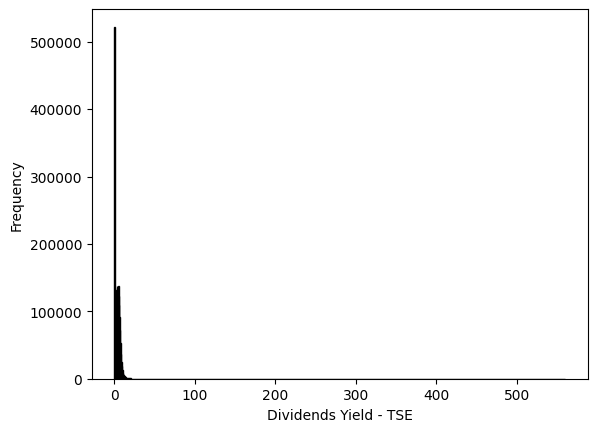

In [101]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df['股利殖利率-TSE'], bins=1000, edgecolor='black')

# Adding labels and title
plt.xlabel('Dividends Yield - TSE')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [102]:
# 看一下99.5百分位數
df['股利殖利率-TSE'].quantile(0.995)

14.52

In [103]:
# 將所有 股利殖利率-TSE 大於 99.5 百分位數的值，都設定為 99.5 百分位數
df.loc[df['股利殖利率-TSE'] > df['股利殖利率-TSE'].quantile(0.995), '股利殖利率-TSE'] = df['股利殖利率-TSE'].quantile(0.995)

In [104]:
df['股利殖利率-TSE'].describe()

count   2076441.000
mean          3.409
std           2.922
min           0.000
25%           0.530
50%           3.190
75%           5.350
max          14.520
Name: 股利殖利率-TSE, dtype: float64

## 2.5 重複值處理

* 相對簡單的問題，但務必要注意。
* 在選擇 keep first 或是 last 之前，請先確認資料的順序。


In [105]:
duplicates = df.duplicated()

In [106]:
# 檢視重複的資料
df[duplicates]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna,最後揭示買價_fillna_2
478449,1101 台泥,2020-01-02,32.264,32.522,32.264,32.485,18470,813465,0.915,0.338,...,0.801,44.100,48.500,39.700,NaN,NaN,NaN,TSE,44.050,44.050
476682,1101 台泥,2020-01-03,32.522,32.596,32.007,32.375,18387,807459,-0.340,0.336,...,1.814,43.950,48.300,39.600,NaN,NaN,NaN,TSE,43.900,43.900
474914,1101 台泥,2020-01-06,32.043,32.191,31.896,32.007,13867,602752,-1.138,0.254,...,0.910,43.450,47.750,39.150,NaN,NaN,NaN,TSE,43.400,43.400
473146,1101 台泥,2020-01-07,32.007,32.117,31.822,32.117,14185,616059,0.345,0.259,...,0.921,43.600,47.950,39.250,NaN,NaN,NaN,TSE,43.550,43.550
471378,1101 台泥,2020-01-08,31.786,32.080,31.786,31.970,13465,583893,-0.459,0.246,...,0.917,43.400,47.700,39.100,NaN,NaN,NaN,TSE,43.350,43.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308743,9962 有益,2021-10-25,13.933,14.315,13.806,13.933,1101,18195,0.306,1.220,...,3.670,16.400,18.000,14.800,NaN,NaN,NaN,OTC,16.400,16.400
1306963,9962 有益,2021-10-26,14.230,14.358,13.806,13.848,1014,16771,-0.610,1.124,...,3.963,16.300,17.900,14.700,NaN,NaN,NaN,OTC,16.250,16.250
1305183,9962 有益,2021-10-27,14.060,14.060,13.551,13.763,777,12563,-0.613,0.861,...,3.681,16.200,17.800,14.600,NaN,NaN,NaN,OTC,16.150,16.150
1303403,9962 有益,2021-10-28,13.636,13.891,13.551,13.636,923,14869,-0.926,1.023,...,2.469,16.050,17.650,14.450,NaN,NaN,NaN,OTC,16.050,16.050


In [107]:
# 移除重複的行
df_no_duplicates = df.drop_duplicates()

In [108]:
# 每當我們刪除行時，索引就會被打亂，因此我們需要重新設置索引
df_no_duplicates.reset_index(drop=True, inplace=True)

In [109]:
# 若當出現重複的行時，我們只保留最後一個
df_no_duplicates = df.drop_duplicates(keep='last')

# 也可以保留第一個
df_no_duplicates = df.drop_duplicates(keep='first')

In [110]:
# 如果只關心特定欄位中的重複值，可以在 duplicated() 和 drop_duplicates() 方法中指定欄位名：

# 以下例子代表每一天的股票代號和日期都不會重複
df_no_duplicates = df.drop_duplicates(subset=['證券代碼', '年月日'], keep='last')

In [111]:
df_no_duplicates

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna,最後揭示買價_fillna_2
35267,1101 台泥,2019-01-02,22.757,22.885,22.598,22.598,6566,234262,-0.281,0.128,...,1.264,35.500,39.050,31.950,NaN,NaN,NaN,TSE,35.500,35.500
33502,1101 台泥,2019-01-03,22.598,22.662,22.344,22.375,9160,323494,-0.986,0.179,...,1.408,35.150,38.650,31.650,NaN,NaN,NaN,TSE,35.150,35.150
31738,1101 台泥,2019-01-04,22.280,22.694,22.216,22.566,10692,376905,0.854,0.209,...,2.134,35.450,38.950,31.950,NaN,NaN,NaN,TSE,35.400,35.400
29975,1101 台泥,2019-01-07,22.821,23.044,22.789,22.917,14906,537441,1.551,0.292,...,1.128,36.000,39.600,32.400,NaN,NaN,NaN,TSE,36.000,36.000
28212,1101 台泥,2019-01-08,22.853,22.885,22.630,22.630,10987,393334,-1.250,0.215,...,1.111,35.550,39.100,32.000,NaN,NaN,NaN,TSE,35.550,35.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115494,9962 有益,2023-08-17,17.050,17.400,17.000,17.300,159,2747,0.290,0.176,...,2.319,17.300,19.000,15.600,NaN,NaN,NaN,OTC,17.300,17.300
2117292,9962 有益,2023-08-18,17.300,17.500,17.250,17.400,231,4020,0.578,0.256,...,1.445,17.400,19.100,15.700,NaN,NaN,NaN,OTC,17.250,17.250
2119090,9962 有益,2023-08-21,17.400,17.400,17.100,17.100,90,1549,-1.724,0.100,...,1.724,17.100,18.800,15.400,NaN,NaN,NaN,OTC,17.100,17.100
2120889,9962 有益,2023-08-22,17.000,17.000,16.700,16.800,442,7446,-1.754,0.490,...,1.754,16.800,18.450,15.150,NaN,NaN,NaN,OTC,16.800,16.800


## 2.6 標準化、歸一化

1. 標準化就是將資料的平均值變為0，標準差變為1。
   - 在應用標準化之前，確保數據的分佈不會因為極端值而受到過度的影響。
2. 歸一化則是將資料縮放到0和1之間。
   - 歸一化使得所有特徵都在相似的範圍內，有助於梯度下降等優化算法更快收斂。
   - 歸一化可能對某些特定算法的性能產生影響，例如 K-Means 或者支持向量機（SVM）。

In [112]:
# 假設我想要把 報酬率% 進行標準化
mean = df['報酬率％'].mean()
std = df['報酬率％'].std()

standardized_data = (df['報酬率％'] - mean) / std
print(standardized_data[:5])

35267   -0.138
33502   -0.418
31738    0.310
29975    0.587
28212   -0.522
Name: 報酬率％, dtype: float32


In [113]:
# 當我想要把多個欄位進行標準化時，可以使用 apply() 方法
def standardize(x):
    return (x - x.mean()) / x.std()

df[['報酬率％_標準化']] = df[['報酬率％']].apply(standardize)

In [114]:
# 檢查一下，是不是真的標準化了
df[['報酬率％', '報酬率％_標準化']].describe()

,報酬率％,報酬率％_標準化
count,2122689.000,2122689.000
mean,0.069,-0.000
std,2.527,1.000
min,-74.780,-29.625
25%,-0.876,-0.374
50%,0.000,-0.027
75%,0.840,0.305
max,190.333,75.305


In [115]:
df.columns

Index(['證券代碼', '年月日', '開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)',
       '成交值(千元)', '報酬率％', '週轉率％', '流通在外股數(千股)', '市值(百萬元)', '最後揭示買價', '最後揭示賣價',
       '報酬率-Ln', '市值比重％', '成交值比重％', '成交筆數(筆)', '本益比-TSE', '本益比-TEJ',
       '股價淨值比-TSE', '股價淨值比-TEJ', '漲跌停', '股價營收比-TEJ', '股利殖利率-TSE', '現金股利率',
       '股價漲跌(元)', '高低價差%', '次日開盤參考價', '次日漲停價', '次日跌停價', '注意股票(A)', '處置股票(D)',
       '全額交割(Y)', '市場別', '最後揭示買價_fillna', '最後揭示買價_fillna_2', '報酬率％_標準化'],
      dtype='object')

### 課堂實作練習:
  - 將`['高低價差%']` 資料進行歸一化，用函數的方式處理。

* 歸一化公式如下，其中 $X_{min}$ 和 $X_{max}$ 分別是資料的最小值和最大值。
- $X_{normalized} = (X - X_{min}) / (X_{max} - X_{min})$

### 加分題:
  - 將`['報酬率％%']` 資料進行標準化，但是要是個別股票自己的平均值和標準差。

- 將程式碼直接寄給 ringsliu0993@gmail.com
- 主旨: 組別_資料歸一化

## 2.7 虛擬變數化與排名化

1. 虛擬變數化: 將類別資料轉換為虛擬變數，以便於進行數據分析。
2. 排名化: 將數值資料轉換為排名，以便於進行數據分析。

- 虛擬變數陷阱： 虛擬變數化可能導致虛擬變數陷阱，即由於虛擬變數之間存在完全共線性，模型無法進行良好的擬合。為了避免虛擬變數陷阱，通常只需使用 n-1 個虛擬變數。
- 模型解釋性： 虛擬變數化會改變模型的解釋性，因為模型的係數現在反映的是相對於參考類別的變化。
- 相同數值處理： 對於具有相同數值的觀測值，可以選擇使用平均排名或其他方法處理。這可能影響最終的排名結果。
- 數據類型： 排名通常應用於連續型變數，而不是類別變數。

In [116]:
df['漲跌停'].unique()

[NaN, '+', '-']
Categories (2, object): ['+', '-']

In [117]:
df['漲停_1'] = np.where(df['漲跌停'] == '+', 1, 0)

# use mask to to the same thing
# Assuming df is your DataFrame
df['漲停_2'] = (df['漲跌停'] == '+').astype(int)
df[df['漲停_1'] == 1][['漲停_1', '漲停_2']]

,漲停_1,漲停_2
526162,1,1
526163,1,1
637447,1,1
1022615,1,1
1072349,1,1
...,...,...
1161171,1,1
1276713,1,1
1312299,1,1
1365703,1,1


In [118]:
# 同理可以創建跌停的欄位
df['跌停_1'] = np.where(df['漲跌停'] == '-', 1, 0)
df['跌停_2'] = (df['漲跌停'] == '-').astype(int)

In [119]:
# 用 groupby() 方法，創建一個cap_rank的欄位
df['cap_rank'] = df.groupby('年月日')['市值比重％'].rank(ascending=False)

df.sort_values(by=['年月日', '市值比重％'], ascending=[True, False])[['年月日', '證券代碼', '市值比重％','cap_rank']]

,年月日,證券代碼,市值比重％,cap_rank
35571,2019-01-02,2330 台積電,19.907,1.000
36629,2019-01-02,6488 環球晶,4.215,2.000
36350,2019-01-02,5347 世界,3.646,3.000
36635,2019-01-02,6505 台塑化,3.432,4.000
35564,2019-01-02,2317 鴻海,3.399,5.000
...,...,...,...,...
2122641,2023-08-23,911608 明輝-DR,NaN,NaN
2122642,2023-08-23,911622 泰聚亨-DR,NaN,NaN
2122643,2023-08-23,911868 同方友友-DR,NaN,NaN
2122644,2023-08-23,912000 晨訊科-DR,NaN,NaN


In [134]:
# 用 groupby() 方法，一步到位，取得每天的前 50 名
df = pd.read_feather('還原股價.feather')
df_rank = df.groupby('年月日').apply(lambda x: x.sort_values(by='市值比重％', ascending=False).head(50))[['年月日', '證券代碼', '市值比重％']]
df_rank.reset_index(drop=True, inplace=True)

In [135]:
df_rank[df_rank['年月日'] == '2023-08-23']

,年月日,證券代碼,市值比重％
56300,2023-08-23,2330 台積電,27.573
56301,2023-08-23,8069 元太,3.960
56302,2023-08-23,6488 環球晶,3.862
56303,2023-08-23,2317 鴻海,2.844
56304,2023-08-23,3529 力旺,2.513
56305,2023-08-23,6446 藥華藥,2.311
56306,2023-08-23,5347 世界,2.163
56307,2023-08-23,2454 聯發科,2.067
56308,2023-08-23,2382 廣達,1.949
56309,2023-08-23,5483 中美晶,1.753


# 3.0 簡單的回測

In [160]:
df = pd.read_feather('還原股價.feather')

df.sort_values(by=['證券代碼', '年月日'], ascending=True, inplace=True)
df.drop_duplicates(subset=['證券代碼', '年月日'], keep='last', inplace=True)

df['年月日'] = pd.to_datetime(df['年月日'])

# Set '年月日' as the index
df.set_index('年月日', inplace=True)

monthly_start_price = df.groupby('證券代碼').resample('M')['收盤價(元)'].first().unstack().transpose()
monthly_end_price = df.groupby('證券代碼').resample('M')['收盤價(元)'].last().unstack().transpose()

monthly_returns = monthly_end_price.pct_change()

monthly_returns

C:\Users\rings\AppData\Local\Temp\ipykernel_18104\2860771830.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_start_price = df.groupby('證券代碼').resample('M')['收盤價(元)'].first().unstack().transpose()
C:\Users\rings\AppData\Local\Temp\ipykernel_18104\2860771830.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_end_price = df.groupby('證券代碼').resample('M')['收盤價(元)'].last().unstack().transpose()
C:\Users\rings\AppData\Local\Temp\ipykernel_18104\2860771830.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fi

證券代碼,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.028,0.064,0.007,0.005,-0.019,0.000,-0.006,0.038,0.013,0.000,...,0.006,0.043,0.112,-0.014,-0.048,0.002,0.054,0.055,-0.014,0.013
2019-03-31,0.074,0.034,0.094,0.015,0.023,0.021,0.012,0.105,-0.023,0.017,...,-0.009,-0.039,0.094,-0.031,-0.093,0.029,0.008,0.066,0.017,0.026
2019-04-30,0.018,0.041,-0.013,0.010,-0.060,0.196,-0.012,0.115,0.004,-0.006,...,-0.006,-0.090,0.263,-0.034,-0.004,-0.044,-0.035,-0.177,0.020,-0.012
2019-05-31,0.021,0.080,0.113,-0.018,-0.023,0.073,-0.009,0.076,0.019,0.098,...,0.028,-0.035,0.104,-0.012,0.036,-0.071,0.126,0.074,0.093,-0.013
2019-06-30,0.073,0.054,0.024,0.020,0.013,0.044,0.043,0.127,0.008,0.036,...,0.061,0.086,-0.021,0.022,-0.015,0.033,0.622,-0.008,-0.050,0.009
2019-07-31,-0.029,-0.065,-0.026,-0.003,-0.020,-0.027,-0.003,-0.062,0.006,0.021,...,0.020,-0.023,0.070,0.333,0.062,0.044,-0.135,0.180,0.039,-0.041
2019-08-31,-0.005,0.029,0.007,-0.005,-0.006,-0.084,-0.009,-0.130,0.008,-0.013,...,-0.011,0.027,0.161,-0.073,0.007,0.141,0.074,-0.095,-0.016,0.005
2019-09-30,0.031,0.007,0.159,-0.011,0.041,0.070,0.024,-0.031,0.033,0.022,...,-0.017,-0.025,-0.040,0.065,0.181,0.044,-0.079,0.071,-0.025,-0.014


In [164]:
# fill the first row with the first row of monthly_start_price / monthly_end_price
monthly_returns.iloc[0,:] = monthly_start_price.iloc[0,:] / monthly_end_price.iloc[0,:] - 1

In [166]:
print(monthly_returns.shape)
monthly_returns.head()

(56, 1930)


證券代碼,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,
2019-01-31,-0.050,-0.073,-0.014,-0.021,-0.007,-0.036,0.028,0.040,0.002,-0.026,...,0.009,-0.045,0.000,0.029,-0.088,-0.095,0.008,-0.071,0.019,-0.013
2019-02-28,0.028,0.064,0.007,0.005,-0.019,0.000,-0.006,0.038,0.013,0.000,...,0.006,0.043,0.112,-0.014,-0.048,0.002,0.054,0.055,-0.014,0.013
2019-03-31,0.074,0.034,0.094,0.015,0.023,0.021,0.012,0.105,-0.023,0.017,...,-0.009,-0.039,0.094,-0.031,-0.093,0.029,0.008,0.066,0.017,0.026
2019-04-30,0.018,0.041,-0.013,0.010,-0.060,0.196,-0.012,0.115,0.004,-0.006,...,-0.006,-0.090,0.263,-0.034,-0.004,-0.044,-0.035,-0.177,0.020,-0.012
2019-05-31,0.021,0.080,0.113,-0.018,-0.023,0.073,-0.009,0.076,0.019,0.098,...,0.028,-0.035,0.104,-0.012,0.036,-0.071,0.126,0.074,0.093,-0.013


In [138]:
# 可是檢查會發現我們的 選股清單 是日頻資料，而我們的股價報酬資料是月頻資料
reb_date = df_rank['年月日'].unique()
reb_date

<DatetimeArray>
['2019-01-02 00:00:00', '2019-01-03 00:00:00', '2019-01-04 00:00:00',
 '2019-01-07 00:00:00', '2019-01-08 00:00:00', '2019-01-09 00:00:00',
 '2019-01-10 00:00:00', '2019-01-11 00:00:00', '2019-01-14 00:00:00',
 '2019-01-15 00:00:00',
 ...
 '2023-08-10 00:00:00', '2023-08-11 00:00:00', '2023-08-14 00:00:00',
 '2023-08-15 00:00:00', '2023-08-16 00:00:00', '2023-08-17 00:00:00',
 '2023-08-18 00:00:00', '2023-08-21 00:00:00', '2023-08-22 00:00:00',
 '2023-08-23 00:00:00']
Length: 1127, dtype: datetime64[ns]

In [140]:
# 因為我們要取每月的第一天，所以我們要把日頻率的資料換成月頻率的資料
df_rank['year_month'] = df_rank['年月日'].dt.strftime('%Y-%m')

In [144]:
df_date = df_rank[['year_month','年月日']].sort_values(by='年月日').drop_duplicates(subset=['year_month'], keep = 'first').reset_index(drop=True)

In [167]:
df_reb = df_rank[df_rank['年月日'].isin(df_date['年月日'])].copy().reset_index(drop=True)
df_reb.head()

,年月日,證券代碼,市值比重％,year_month
0,2019-01-02,2330 台積電,19.907,2019-01
1,2019-01-02,6488 環球晶,4.215,2019-01
2,2019-01-02,5347 世界,3.646,2019-01
3,2019-01-02,6505 台塑化,3.432,2019-01
4,2019-01-02,2317 鴻海,3.399,2019-01


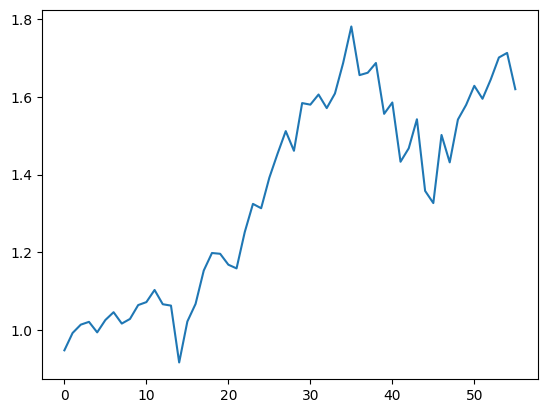

In [174]:
reb_date = df_reb['年月日'].unique()

portfolio_return = []
for i in range(len(reb_date)):
    reb_ticker_list = df_reb[df_reb['年月日'] == reb_date[i]]['證券代碼'].values
    mean_return = np.mean(monthly_returns[reb_ticker_list].iloc[i,:])
    portfolio_return.append(mean_return)

# Calculate the portfolio return
portfolio_return = np.array(portfolio_return) + 1
portfolio_cumulative_return = portfolio_return.cumprod()

# plot the portfolio_cumulative_return
plt.plot(portfolio_cumulative_return)

### 課堂實作練習:

  - 將`['股利殖利率-TSE']` 排序，先提除99百分位數以上的資料後，選擇最高的前50名，組成投資組合。
  - 計算每個月的報酬率，並且計算出累積報酬率。

### 加分題:
  - 多計算另一個投資組合是排名 50 ~ 100名。
  - 同樣計算每個月的報酬率，並且計算出累積報酬率。

- 將程式碼和結果直接寄給 ringsliu0993@gmail.com
- 主旨: 組別_投資組合選股

# 4.0 績效評量

In [424]:

class Stats():
    @staticmethod
    def check_series(values):
        """檢查 input series 是否有日期 index, 並轉換為 float

        Args:
            values (pd.Series): pd.Series with datetime index

        Raises:
            TypeError: 如果不是 pd.Series 則 raise TypeError
            TypeError: 如果 index 不是 datetime 則 raise TypeError

        Returns:
            values: 轉換為 float 的 pd.Series
        """
        if not isinstance(values, pd.Series):
            raise TypeError("values must be a pandas Series")
        # check if values have a datetime index
        if not isinstance(values.index, pd.DatetimeIndex):
            raise TypeError("values must have a datetime index")
        # convert values to float
        values = values.astype(float)
        return values

    @staticmethod
    def drawdown(values):
        """計算 drawdown

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series

        Returns:
            df: 包含 drawdown, maximum_drawdown 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]

        df["drawdown"] = 1 - df[name] / df[name].cummax()
        df["maximum_drawdown"] = df["drawdown"].cummax()

        return df

    @staticmethod
    def drawdown_detail(values, threshold= 0.1) :
        """取得 drawdown 的詳細資訊，包含開始日期、結束日期、最大回撤、回撤日期、回撤天數、回復天數、總天數

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            threshold (float, optional): 忽略小於 threshold 的 drawdown 資料. Defaults to 0.1.

        Returns:
            pd.DataFrame: 包含開始日期、結束日期、最大回撤、回撤日期、回撤天數、回復天數、總天數 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = Stats.drawdown(values)

        df["sign"] = np.where(df["drawdown"] > 0, 1, 0)
        df["sign"] = np.where(df["sign"] != df["sign"].shift(1), 1, 0)
        df["cumsum"] = df["sign"].cumsum()

        df_drawdown = pd.DataFrame([])
        df_drawdown["start_date"] = df.groupby("cumsum")["date"].head(1).values
        df_drawdown["end_date"] = df.groupby("cumsum")["date"].tail(1).values
        df_drawdown["drawdown"] = df.groupby("cumsum")["drawdown"].max().values
        df_drawdown = df_drawdown.dropna()
        df_drawdown["drawdown_date"] = df.loc[
            df.groupby("cumsum")["drawdown"].idxmax().dropna()
        ]["date"].values

        df_drawdown.sort_values("drawdown", ascending=False, inplace=True)
        df_drawdown["days_to_drawdown"] = (
            df_drawdown["drawdown_date"] - df_drawdown["start_date"]
        ).dt.days
        df_drawdown["days_to_recover"] = (
            df_drawdown["end_date"] - df_drawdown["drawdown_date"]
        ).dt.days
        df_drawdown["total_days"] = (
            df_drawdown["end_date"] - df_drawdown["start_date"]
        ).dt.days
        df_drawdown = df_drawdown[(df_drawdown["drawdown"] > threshold)].copy()
        df_drawdown.reset_index(drop=True, inplace=True)
        return df_drawdown

    @staticmethod
    def monthly_return(values, pivot = False):
        """計算月報酬率，若 pivot=True 則回傳 pivot table

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            pivot (bool, optional): 是否回傳 pivot table. Defaults to False.

        Returns:
            pd.DataFrame: 月報酬的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]
        df["month"] = df["date"].dt.month
        df["year"] = df["date"].dt.year

        df_monthly_return = df.groupby(["year", "month"])[name].count().reset_index()
        df_monthly_return.columns = ["year", "month", "count"]
        df_monthly_return["start_value"] = (
            df.groupby(["year", "month"])[name].head(1).reset_index(drop=True)
        )
        df_monthly_return["end_value"] = (
            df.groupby(["year", "month"])[name].tail(1).reset_index(drop=True)
        )
        df_monthly_return["return"] = df_monthly_return["end_value"].pct_change()
        # mask where return is not na, fill return with start_value / end_value
        df_monthly_return["return"] = df_monthly_return["return"].mask(
            df_monthly_return["return"].isna(),
            df_monthly_return["end_value"] / df_monthly_return["start_value"] - 1,
        )
        if pivot == False:
            return df_monthly_return
        else:
            return df_monthly_return.pivot(
                index="year", columns="month", values="return"
            )

    @staticmethod
    def yearly_return(values):
        """計算年報酬率

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series

        Returns:
            pd.DataFrame: 年報酬的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]
        df["year"] = df["date"].dt.year

        df_yearly_return = df.groupby(["year"])[name].count().reset_index()
        df_yearly_return.columns = ["year", "count"]
        df_yearly_return["start_value"] = (
            df.groupby(["year"])[name].head(1).reset_index(drop=True)
        )
        df_yearly_return["end_value"] = (
            df.groupby(["year"])[name].tail(1).reset_index(drop=True)
        )
        df_yearly_return["return"] = df_yearly_return["end_value"].pct_change()
        # mask where return is not na, fill return with start_value / end_value
        df_yearly_return["return"] = df_yearly_return["return"].mask(
            df_yearly_return["return"].isna(),
            df_yearly_return["end_value"] / df_yearly_return["start_value"] - 1,
        )
        return df_yearly_return

    @staticmethod
    def alpha(values, benchmark, win_rate=False):
        """依照 投組價值 與 Benchmark 計算 alpha, 包含月報酬、年報酬，若 win_rate=True 則包含月度勝率

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            benchmark (pd.Series): 應為 Benchmark 的 pd.Series
            win_rate (bool, optional): 是否回傳 月度勝率欄位. Defaults to False.

        Returns:
            pd.DataFrame: 年月報酬alpha 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        benchmark = Stats.check_series(benchmark)

        # get only the intersection of values and benchmark
        values = values.loc[values.index.intersection(benchmark.index)]
        benchmark = benchmark.loc[benchmark.index.intersection(values.index)]

        pivot_values = Stats.monthly_return(values, pivot=True)
        pivot_benchmark = Stats.monthly_return(benchmark, pivot=True)

        df_alpha = pivot_values - pivot_benchmark

        yearly_return_values = Stats.yearly_return(values)
        yearly_return_benchmark = Stats.yearly_return(benchmark)

        df_yearly_alpha = pd.merge(
            yearly_return_values,
            yearly_return_benchmark,
            on="year",
            suffixes=("_portfolio", "_benchmark"),
        )
        df_yearly_alpha["return_portfolio"] = df_yearly_alpha[
            "return_portfolio"
        ].fillna(0)
        df_yearly_alpha["return_benchmark"] = df_yearly_alpha[
            "return_benchmark"
        ].fillna(0)
        df_yearly_alpha["alpha"] = (
            df_yearly_alpha["return_portfolio"] - df_yearly_alpha["return_benchmark"]
        )
        if win_rate:
            # add a column for the ratio how many months are positive
            df_alpha["win_rate"] = df_alpha[df_alpha > 0].count(
                axis=1
            ) / df_alpha.count(axis=1)

        df_alpha["year"] = df_yearly_alpha["alpha"].values

        return df_alpha

    @staticmethod
    def return_stat(values, benchmark = None, days_of_year=252):
        """計算報酬率相關統計量，包含: 總報酬、幾何平均報酬、算術平均報酬、標準差、夏普比率、最大回撤、勝率(報酬>0)

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            benchmark (pd.Series, optional): 應為 Benchmark 的 pd.Series. Defaults to None.
            days_of_year (int, optional): 年化因子. Defaults to 252.

        Returns:
            pd.Series | pd.DataFrame: 若 benchmark=None 則回傳 pd.Series, 否則回傳 pd.DataFrame
        """
        values = Stats.check_series(values)
        return_series = values.pct_change().dropna()
        if benchmark is not None:
            # 若有 benchmark，則取得兩者交集，並計算 投組 與 benchmark 的統計量
            benchmark = Stats.check_series(benchmark)
            values = values.loc[values.index.intersection(benchmark.index)]
            benchmark = benchmark.loc[benchmark.index.intersection(values.index)]

            stats = Stats.return_stat(values, days_of_year=days_of_year)
            stats_benchmark = Stats.return_stat(
                benchmark, days_of_year=days_of_year
            ).rename("Benchmark")

            stats = pd.concat([stats, stats_benchmark], axis=1)
            stats.columns = ["Portfolio", "Benchmark"]
            return stats

        equity = (return_series + 1).cumprod()
        geo_return_annual = (equity.iloc[-1]) ** (days_of_year / len(equity)) - 1
        arith_return_annual = (return_series.mean() + 1) ** (days_of_year) - 1
        # 投組勝率
        hit_rate = sum(return_series > 0) / len(return_series)
        std_annual = return_series.std() * np.sqrt(days_of_year)

        sharpe_annual = geo_return_annual / std_annual

        # 計算MDD
        drawdown = equity.cummax() - equity
        d = drawdown / (drawdown + equity)
        mdd = d.max()

        # 周轉率
        result = pd.Series(
            [
                equity.iloc[-1],
                geo_return_annual,
                arith_return_annual,
                std_annual,
                sharpe_annual,
                mdd,
                hit_rate,
            ]
        )
        result.index = [
            "Total Return",
            "Geometric Mean Return",
            "Arithmetic Mean Return",
            "Standard Deviation",
            "Sharpe Ratios",
            "mdd",
            "Hit Rate",
        ]
        return result.round(4)


年月日
2019-01-30   23.776
2019-01-29   23.617
2019-01-28   23.553
2019-01-25   23.298
2019-01-24   23.171
              ...  
2023-08-17   35.650
2023-08-18   35.150
2023-08-21   35.400
2023-08-22   35.400
2023-08-23   35.300
Name: 收盤價(元), Length: 1196, dtype: float32

In [434]:
Stats.monthly_return(df[df['證券代碼'] == '1101 台泥']['收盤價(元)'])

,year,month,count,start_value,end_value,return
0,2019,1,21,22.598,23.776,0.052
1,2019,2,13,23.967,24.444,0.028
2,2019,3,20,24.317,26.258,0.074
3,2019,4,20,26.322,26.736,0.018
4,2019,5,22,26.863,27.309,0.021
5,2019,6,19,27.627,29.314,0.073
6,2019,7,23,29.378,28.455,-0.029
7,2019,8,21,28.041,28.323,-0.005
8,2019,9,19,28.176,29.207,0.031
9,2019,10,21,29.207,29.797,0.020
